In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
                        

In [3]:
N = 1000
series = np.sin(0.1*np.arange(N))
series_noise = series + np.random.randn(N) * 0.1

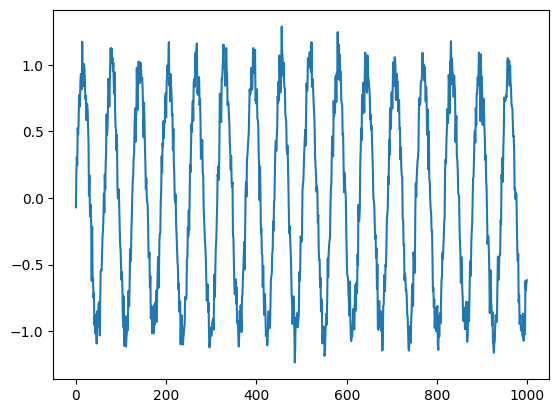

In [34]:
plt.plot(series_noise)
plt.show()

In [31]:
T = 10
X = []
Y = []

for t in range(len(series_noise)-T):
    x=series_noise[t:t+T]
    y=series_noise[t+T]
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y).reshape(-1,1)

In [32]:
Y.shape

(990, 1)

In [33]:
N = len(X)
print("X shape", X.shape, "Y shape", Y.shape)

X shape (990, 10) Y shape (990, 1)


In [35]:
model = nn.Linear(T, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [36]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))


In [19]:
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test, 
            epochs=200):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        train_losses[it] = loss.item()
        loss.backward()
        optimizer.step()

        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[it] = test_loss.item()

        print(f"Epoch {it}/{epochs} train loss: {train_losses[it]} test_losses: {test_loss}")
    return train_losses, test_losses

In [37]:
train_losses, test_losses = full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test, 
            epochs=200)

Epoch 0/200 train loss: 0.3712599575519562 test_losses: 0.40321803092956543
Epoch 1/200 train loss: 0.40727928280830383 test_losses: 0.2838911712169647
Epoch 2/200 train loss: 0.2861635684967041 test_losses: 0.1512840837240219
Epoch 3/200 train loss: 0.1495775431394577 test_losses: 0.13064825534820557
Epoch 4/200 train loss: 0.12778116762638092 test_losses: 0.1282019168138504
Epoch 5/200 train loss: 0.12614016234874725 test_losses: 0.07803662121295929
Epoch 6/200 train loss: 0.0765206441283226 test_losses: 0.02746559865772724
Epoch 7/200 train loss: 0.02594102919101715 test_losses: 0.025741219520568848
Epoch 8/200 train loss: 0.02409818023443222 test_losses: 0.05282816290855408
Epoch 9/200 train loss: 0.05094824731349945 test_losses: 0.060205329209566116
Epoch 10/200 train loss: 0.057835858315229416 test_losses: 0.04594018682837486
Epoch 11/200 train loss: 0.043205589056015015 test_losses: 0.04120860993862152
Epoch 12/200 train loss: 0.038718339055776596 test_losses: 0.0570796690881252

[]

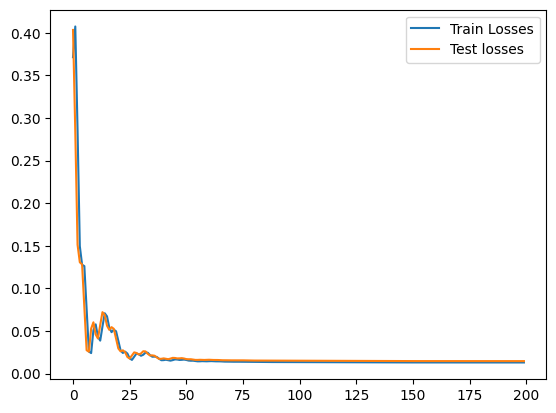

In [38]:
plt.plot(train_losses, label="Train Losses")
plt.plot(test_losses, label="Test losses")
plt.legend()
plt.plot()

In [39]:
# Wrong way to do it

validation_target = Y[-N//2:]
validation_predictions = []

i = 0
while len(validation_predictions) < len(validation_target):
    input_ = X_test[i].view(1, -1)
    p = model(input_)[0,0].item() # 1x1 array a escalar
    i += 1

    validation_predictions.append(p)



[]

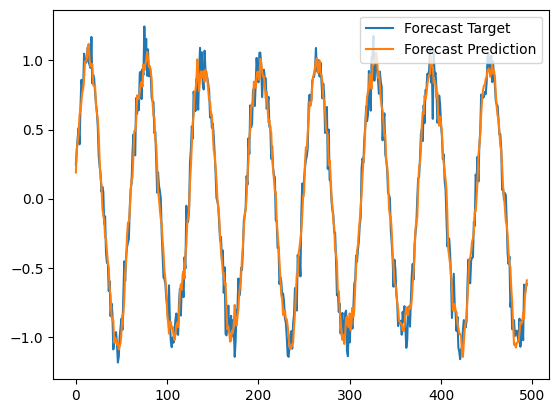

In [40]:
plt.plot(validation_target, label="Forecast Target")
plt.plot(validation_predictions, label="Forecast Prediction")
plt.legend()
plt.plot()

In [41]:

validation_target = Y[-N//2:]
validation_predictions = []

i = 0

x_ = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
    input_ = x_.view(1, -1)
    p = model(input_) # 1x1 array a escalar
    i += 1

    validation_predictions.append(p[0,0].item())
    x_ = torch.cat((x_[1:], p[0]))


[]

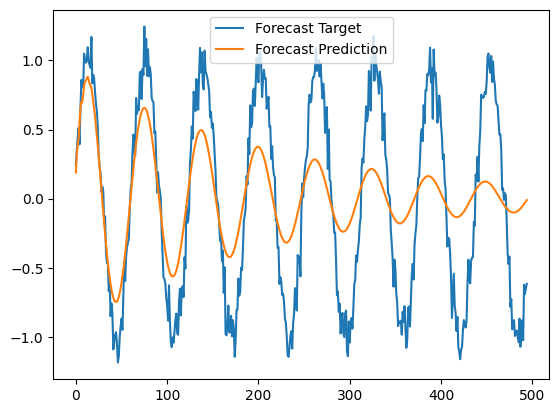

In [42]:
plt.plot(validation_target, label="Forecast Target")
plt.plot(validation_predictions, label="Forecast Prediction")
plt.legend()
plt.plot()